### Let's start with downloading the raw data

In [1]:
import sys
import os
# to reach the dataloader_functions module
module_path = os.path.abspath(os.path.join( ".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader_functions.download_data import download_raw_data
current_dir = os.getcwd()

In [2]:
### TODO update this section per dataset
dataset_config = {
    'dataset_name': 'laptops', # dataset name
    'source': 'kaggle', # ['local', 'kaggle', 'openml', ''hf]
    'remote_path': 'dhanushbommavaram/laptop-dataset',
    'files': ['complete laptop data0.csv'],
    'rename_files': ['laptops.csv'],
    'task': 'reg', # ['reg', 'cls']
    'target': 'Price', # target column name
}

In [3]:
if dataset_config['task'] == 'clf':
    dataset_subfolder = os.path.join('raw', 'classification', dataset_config['dataset_name']) 
elif dataset_config['task'] == 'reg':
    dataset_subfolder = os.path.join('raw', 'regression', dataset_config['dataset_name'])
else:
    raise ValueError(f"Unknown task: {dataset_config['task']}")

# this path needs to be modified based on the location of the notebook
download_path = os.path.join(current_dir, '..', '..', 'datasets_files', dataset_subfolder)

if download_raw_data(
    dataset_config=dataset_config,
    download_path=download_path,
    force_download=False,
    remove_unlisted=True,
) is not None:
    print(f"Downloaded {dataset_config['dataset_name']} dataset to {download_path}")

Info: Dataset already downloaded in /home/guptaa/anshul/FreeText_TaBench/datasets_notebooks/regression/../../datasets_files/raw/regression/laptops.
Downloaded laptops dataset to /home/guptaa/anshul/FreeText_TaBench/datasets_notebooks/regression/../../datasets_files/raw/regression/laptops


### Now we need to preprocess the data

In [4]:
from dataloader_functions.load_and_pp_raw_data import _drop_empty_columns, _drop_single_value_columns
from dataloader_functions.utils.data_2_df import read_any_to_df
import pandas as pd

import os
current_dir = os.getcwd()

In [5]:
dataset_files_df = []

if dataset_config['rename_files'] is None or len(dataset_config['rename_files']) == 0:
    dataset_config['rename_files'] = dataset_config['files']

for file in dataset_config['rename_files']:

    file_location = os.path.join(download_path, file)

    print(f"Loading {file_location}")

    dataset_files_df.append(read_any_to_df(file_location))

# example of the loaded df data:
pd.set_option('display.max_columns', None)
dataset_files_df[0].head(n=3)

Loading /home/guptaa/anshul/FreeText_TaBench/datasets_notebooks/regression/../../datasets_files/raw/regression/laptops/laptops.csv


,Unnamed: 0,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,Color,Type,Suitable For,Power Supply,Battery Cell,MS Office Provided,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Clock Speed,Expandable Memory,Cache,Graphic Processor,Number of Cores,OS Architecture,Operating System,Supported Operating System,Mic In,USB Port,HDMI Port,Touchscreen,Screen Size,Screen Resolution,Screen Type,Speakers,Internal Mic,Sound Properties,Wireless LAN,Bluetooth,Dimensions,Weight,Disk Drive,Finger Print Sensor,Keyboard,Backlit Keyboard,Additional Features,Warranty Summary,Warranty Service Type,Covered in Warranty,Not Covered in Warranty,Domestic Warranty,Ethernet,Web Camera,Pointer Device,Included Software,Battery Backup,Chipset,Memory Slots,RAM Frequency,RJ45,Sound Chip,Brightness,Laptop Bag,Other Accessories,International Warranty,Wireless WAN,Recovery Options,RPM,Hardware Interface,Face Recognition,System Architecture,Refresh Rate,Antivirus,Multi Card Slot,Lock Port,NFC Support,HDD Capacity,Stylus Included,TGP,VGA Port,Color Gamut,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
0,0,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,5.0,"?2,34,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G733ZW-LL139WS,90NR08G2-M007S0,G733ZW-LL139WS,ROG Strix SCAR 17,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,GDDR6,8 GB,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,64,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,43.94 cm (17.3 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,395 x 282 x 28.3 mm,2.90 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 15 Core i9 12th Gen - (32 ...,NaN,"?2,29,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G533ZW-LN136WS,90NR0872-M007L0,G533ZW-LN136WS,ROG Strix SCAR 15,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,GDDR6,8 GB,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,64,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,39.62 cm (15.6 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,354 x 259 x 27.2 mm,2.30 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,HP Victus Ryzen 7 Octa Core 5800H - (16 GB/512...,NaN,"?1,04,091","Laptop, battery, adapter, cables and user manuals",16-e0351AX,552X1PA#ACJ,16-e0351AX,Victus,Mica Silver,Gaming Laptop,Gaming,NaN,4 cell,Yes,GDDR6,4 GB,AMD,Ryzen 7 Octa Core,NaN,Yes,512 GB,16 GB,DDR4,5800H,3.2 GHz upto max turbo frequency at 4.4 GHz,NaN,16MB,NVIDIA GeForce RTX 3050,8.0,64 bit,Windows 11 Home,Windows 11 Home 64 Plus Single

In [6]:
## Run some basic data cleaning

dataset_files_gen_cleaned = []
missing_ratio_threshold = 0.5 # TODO the threshold can be changed

for df_file in dataset_files_df:
    df_size = df_file.shape
    # 1. Drop columns with more than 50% missing values
    df_file = _drop_empty_columns(df_file, threshold=missing_ratio_threshold)   
    # 2. Drop columns with only one unique value
    df_file = _drop_single_value_columns(df_file)
    # 3. remove duplicates
    df_file = df_file.drop_duplicates()
    # 4. remove rows with missing target values
    df_file = df_file[df_file[dataset_config['target']].notna()]
    # 5. drop unnamed columns
    df_file = df_file.loc[:, ~df_file.columns.str.contains('^Unnamed')]

    dataset_files_gen_cleaned.append(df_file)

    print(f"Dataframe shape before/afrer cleaning: {df_size} / {df_file.shape}")

Dropped: Index(['Dedicated Graphic Memory Type', 'Dedicated Graphic Memory Capacity',
       'Expandable Memory', 'Supported Operating System', 'Ethernet',
       'Chipset', 'Memory Slots', 'RAM Frequency', 'RJ45', 'Sound Chip',
       'Brightness', 'Laptop Bag', 'Other Accessories',
       'International Warranty', 'Wireless WAN', 'Recovery Options', 'RPM',
       'Face Recognition', 'Refresh Rate', 'Antivirus', 'Lock Port',
       'NFC Support', 'HDD Capacity', 'Stylus Included', 'TGP', 'VGA Port',
       'Color Gamut', 'Security Chip', 'Inbuilt 4G LTE', 'Cloud Storage',
       'S-video', 'Dock Port', 'Firewire Port', 'RJ11', 'Read/Write Speed',
       'EMMC Storage Capacity', 'Optane Memory'],
      dtype='object')
Dataframe shape before/afrer cleaning: (984, 98) / (984, 60)


In [7]:
## TODO: Now run custom data cleaning -> remove semantically non-sensical values

cols_to_drop = ['link', 'Part Number', 'Model Number', 'Model Name']
dataset_files_cleaned = []

# assuming for multiple files we still want to drop the same columns
for df_file in dataset_files_gen_cleaned:
    df_size = df_file.shape
    for col in cols_to_drop:
        if col in df_file.columns:
            df_file.drop(col, axis=1, inplace=True)
        else:
            print(f"Column {col} not found in dataframe")

    dataset_files_cleaned.append(df_file)    
    print(f"Dataframe shape before/afrer by-hand cleaning: {df_size} / {df_file.shape}")


Dataframe shape before/afrer by-hand cleaning: (984, 60) / (984, 56)


In [8]:
### for some features, we need to allow some minimal data processing
# in our example, we need Price to be numeric (remove the currency sign)
# we argue that any further processing should be done in the benchmarked pipeline
# any further processing requires an expert, which breaks the idea of general text inclusion
# in that case each model would need to be trained on a different dataset fitted to their needs

for df_file in dataset_files_cleaned:
    # print the first 3 rows of the Price column
    print("before: ", df_file['Price'].head(n=1))
    # remove the currency sign prefix
    # Step 1: Remove non-digit characters (like '?', ',')
    if df_file['Price'].dtype == 'object':
        # Check if the column is of type object
        # If so, remove non-digit characters
        df_file['Price'] = df_file['Price'].str.replace(r'[^\d]', '', regex=True)

    # Step 2: Convert the column to integers
    df_file['Price'] = pd.to_numeric(df_file['Price'])
    print("after: ", df_file['Price'].head(n=1))

    # remove rows with missing values in the Price column
    df_file.dropna(subset=['Price'], inplace=True)

dataset_files_by_hand_cleaned = dataset_files_cleaned

before:  0    ?2,34,990
Name: Price, dtype: object
after:  0    234990
Name: Price, dtype: int64


### Now it is time to visualize our changes

In [9]:
pd.set_option('display.max_columns', None)

dataset_files_by_hand_cleaned[0].head(n=2)

,name,user rating,Price,Sales Package,Series,Color,Type,Suitable For,Power Supply,Battery Cell,MS Office Provided,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Clock Speed,Cache,Graphic Processor,Number of Cores,OS Architecture,Operating System,Mic In,USB Port,HDMI Port,Touchscreen,Screen Size,Screen Resolution,Screen Type,Speakers,Internal Mic,Sound Properties,Wireless LAN,Bluetooth,Dimensions,Weight,Disk Drive,Finger Print Sensor,Keyboard,Backlit Keyboard,Additional Features,Warranty Summary,Warranty Service Type,Covered in Warranty,Not Covered in Warranty,Domestic Warranty,Web Camera,Pointer Device,Included Software,Battery Backup,Hardware Interface,System Architecture,Multi Card Slot
0,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,5.0,234990,"Laptop, Power Adaptor, User Guide, Warranty Do...",ROG Strix SCAR 17,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,43.94 cm (17.3 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,395 x 282 x 28.3 mm,2.90 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASUS ROG Strix SCAR 15 Core i9 12th Gen - (32 ...,NaN,229990,"Laptop, Power Adaptor, User Guide, Warranty Do...",ROG Strix SCAR 15,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,39.62 cm (15.6 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,354 x 259 x 27.2 mm,2.30 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's figure out which columns should be viewed as categorical / numerical / textual

we can start with a simple heuristic:
1. numerical is everything which
    - keeps most of its character length after non-numeral strip
    - has about the same number of unique values after the strip
    + for the purpose of keeping "semantic information", hand picked columns can be viewed also as non-numerical, that is not the default benchmark approach though

2. categorical is everthing non numerical, which can be then divided into N (where N << Num instances) unique categories

3. textual is everything else

In [10]:
import pandas as pd
import re

def is_mostly_numeric(series, length_threshold=0.5, unique_threshold=0.8):
    """Check if column is mostly numeric after stripping non-numeric chars."""
    stripped = series.astype(str).str.replace(r"[^\d\.\-]", "", regex=True)
    
    original_len = series.astype(str).str.len().replace(0, 1)  # avoid div by zero
    length_ratio = (stripped.str.len() / original_len).mean()

    unique_ratio = stripped.nunique(dropna=False) / max(series.nunique(dropna=False), 1)

    return length_ratio > length_threshold and unique_ratio > unique_threshold

def classify_columns(df, unique_ratio_threshold=None, explicit_nunique_threshold=None):
    """
    Classify dataframe columns into numerical, categorical, textual.
    - Binary categorical (2 unique values) is considered categorical.
    """
    n_rows = len(df)

    # Determine threshold for categorical vs textual
    if explicit_nunique_threshold is not None:
        nunique_threshold = explicit_nunique_threshold
    elif unique_ratio_threshold is not None:
        nunique_threshold = int(unique_ratio_threshold * n_rows)
    else:
        nunique_threshold = int(0.05 * n_rows)  # default 5%

    nunique_threshold = max(10, nunique_threshold)  # safeguard
    print(f"Threshold for categorical vs textual: {nunique_threshold}")

    numerical_cols = []
    categorical_cols = []
    textual_cols = []

    for col in df.columns:
        series = df[col]
        nunique = series.nunique(dropna=False)

        if pd.api.types.is_numeric_dtype(series):
            if nunique <= nunique_threshold:
                categorical_cols.append(col)
            else:
                numerical_cols.append(col)
        
        elif pd.api.types.is_string_dtype(series) or pd.api.types.is_object_dtype(series):
            if is_mostly_numeric(series):
                numerical_cols.append(col)
            else:
                if nunique <= nunique_threshold:
                    categorical_cols.append(col)
                else:
                    textual_cols.append(col)
        else:
            print(f"⚠️ Unhandled column type: '{col}' (dtype={series.dtype})")

    print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    print(f"Textual columns ({len(textual_cols)}): {textual_cols}")

    return numerical_cols, categorical_cols, textual_cols

# Example usage:
for df_file in dataset_files_by_hand_cleaned:
    # Ratio-based (5% of rows)
    # umerical_cols, categorical_cols, textual_cols = classify_columns(df_file, unique_ratio_threshold=0.05)
    print("")
    # OR explicit value (e.g., anything <= 50 is categorical)
    numerical_cols, categorical_cols, textual_cols = classify_columns(df_file, explicit_nunique_threshold=50)



Threshold for categorical vs textual: 50
Numerical columns (1): ['Price']
Categorical columns (29): ['user rating', 'Type', 'Battery Cell', 'MS Office Provided', 'Processor Brand', 'Processor Name', 'Processor Generation', 'SSD', 'SSD Capacity', 'RAM', 'RAM Type', 'Cache', 'Number of Cores', 'OS Architecture', 'Operating System', 'Mic In', 'Touchscreen', 'Screen Size', 'Bluetooth', 'Disk Drive', 'Finger Print Sensor', 'Backlit Keyboard', 'Warranty Service Type', 'Covered in Warranty', 'Not Covered in Warranty', 'Domestic Warranty', 'Pointer Device', 'Hardware Interface', 'System Architecture']
Textual columns (26): ['name', 'Sales Package', 'Series', 'Color', 'Suitable For', 'Power Supply', 'Processor Variant', 'Clock Speed', 'Graphic Processor', 'USB Port', 'HDMI Port', 'Screen Resolution', 'Screen Type', 'Speakers', 'Internal Mic', 'Sound Properties', 'Wireless LAN', 'Dimensions', 'Weight', 'Keyboard', 'Additional Features', 'Warranty Summary', 'Web Camera', 'Included Software', 'Ba

Now let's just try to visualize the kept features, their example values, and their cat/num/text allocation

In [11]:
summary = []
for col in df_file.columns:
    if col in categorical_cols:
        col_type = "categorical"
        num_categories = df_file[col].nunique(dropna=True)
        num_categories_display = int(num_categories)
    elif col in textual_cols:
        col_type = "textual"
        num_categories = df_file[col].nunique(dropna=True)
        num_categories_display = int(num_categories)
    elif col in numerical_cols:
        col_type = "numerical"
        num_categories = df_file[col].nunique(dropna=True)
        num_categories_display = '~ ' + str(num_categories) + ' ~'
    else:
        col_type = "unknown"
        num_categories_display = '--'

    example = df_file[col].dropna().iloc[0] if df_file[col].dropna().size > 0 else None
    summary.append({
        'Column Name': col,
        'Example Value': str(example),
        'Type': col_type,
        '# Categories': num_categories_display
    })

summary_df = pd.DataFrame(summary)

# TODO: by hand changes of the type and category count -> e.g. for 'Location':
#    # Post-processing: override the type and category count for 'Location'
#    # summary_df.loc[summary_df['Column Name'] == 'Location', 'Type'] = 'textual'
#    # num_categories = df_file['Location'].nunique(dropna=True)
#    # summary_df.loc[summary_df['Column Name'] == 'Location', '# Categories'] = int(num_categories)

pd.set_option('display.max_rows', None)
display(summary_df)  # Or print(summary_df)

,Column Name,Example Value,Type,# Categories
0,name,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,textual,943
1,user rating,5.0,categorical,28
2,Price,234990,numerical,~ 433 ~
3,Sales Package,"Laptop, Power Adaptor, User Guide, Warranty Do...",textual,106
4,Series,ROG Strix SCAR 17,textual,257
5,Color,Off Black,textual,132
6,Type,Gaming Laptop,categorical,9
7,Suitable For,Gaming,textual,52
8,Power Supply,280 W AC Adapter,textual,115
9,Battery Cell,4 cell,categorical,31


#### We also need to make sure that numerical columns are actually numerical :)

In [12]:
import re
import pandas as pd
import copy

from dataloader_functions.load_and_pp_raw_data import clean_numerical_columns

summary_df, dataset_files_by_hand_cleaned = clean_numerical_columns(summary_df, dataset_files_by_hand_cleaned)

pd.set_option('display.max_rows', None)
display(summary_df)


,Column Name,Example Value,Type,# Categories
0,name,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,textual,943
1,user rating,5.0,categorical,28
2,Price,234990.0,numerical,433
3,Sales Package,"Laptop, Power Adaptor, User Guide, Warranty Do...",textual,106
4,Series,ROG Strix SCAR 17,textual,257
5,Color,Off Black,textual,132
6,Type,Gaming Laptop,categorical,9
7,Suitable For,Gaming,textual,52
8,Power Supply,280 W AC Adapter,textual,115
9,Battery Cell,4 cell,categorical,31


### Saving the processed data and loading it back up

In [13]:
import os
import pandas as pd

# Handle rename_files fallback
if dataset_config['rename_files'] is None or len(dataset_config['rename_files']) == 0:
    dataset_config['rename_files'] = dataset_config['files']

for i, df_file in enumerate(dataset_files_by_hand_cleaned):
    df_with_meta = df_file.copy()

    # Get corresponding file name
    file_name = dataset_config['rename_files'][i]
    file_base = os.path.splitext(file_name)[0]

    # Try assigning multi-index header from summary
    try:
        df_with_meta.columns = pd.MultiIndex.from_frame(
            summary_df[['Column Name', 'Type', '# Categories']]
        )
        local_summary = summary_df.copy()
    except ValueError:
        local_summary = summary_df.copy()
        if dataset_config['target'] in local_summary['Column Name'].values:
            local_summary = local_summary[local_summary['Column Name'] != dataset_config['target']]
            df_with_meta.columns = pd.MultiIndex.from_frame(
                local_summary[['Column Name', 'Type', '# Categories']]
            )
        else:
            raise

    # Construct and save everything together
    output_filename = f"{file_base}_processed.pkl"
    output_path = os.path.join(download_path, output_filename)

    save_bundle = {
        'data': df_with_meta,
        'summary': local_summary,
        'config': dataset_config
    }

    pd.to_pickle(save_bundle, output_path)
    print(f"Saved: {output_path}")


Saved: /home/guptaa/anshul/FreeText_TaBench/datasets_notebooks/regression/../../datasets_files/raw/regression/laptops/laptops_processed.pkl


In [14]:
import os
import pandas as pd

# Loop through processed files in rename_files
for file_name in dataset_config['rename_files']:
    # Remove .csv or .tsv extension to get the base name
    file_base = os.path.splitext(file_name)[0]
    processed_filename = f"{file_base}_processed.pkl"
    processed_path = os.path.join(download_path, processed_filename)

    # Load the bundled dictionary (data + summary + config)
    bundle = pd.read_pickle(processed_path)

    # Extract components
    loaded_df = bundle['data']
    summary_df = bundle['summary']
    loaded_config = bundle['config']

    print(f"\n=== {file_base.upper()} ===")
    print(f"Loaded config keys: {list(loaded_config.keys())}")

    # Show metadata
    meta_df = pd.DataFrame(loaded_df.columns.tolist(), columns=['Column Name', 'Type', '# Categories'])
    display(meta_df)

    # Flatten for modeling
    loaded_df.columns = loaded_df.columns.get_level_values(0)
    display(loaded_df.head(n=3))



=== LAPTOPS ===
Loaded config keys: ['dataset_name', 'source', 'remote_path', 'files', 'rename_files', 'task', 'target']


,Column Name,Type,# Categories
0,name,textual,943
1,user rating,categorical,28
2,Price,numerical,433
3,Sales Package,textual,106
4,Series,textual,257
5,Color,textual,132
6,Type,categorical,9
7,Suitable For,textual,52
8,Power Supply,textual,115
9,Battery Cell,categorical,31


Column Name,name,user rating,Price,Sales Package,Series,Color,Type,Suitable For,Power Supply,Battery Cell,MS Office Provided,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Clock Speed,Cache,Graphic Processor,Number of Cores,OS Architecture,Operating System,Mic In,USB Port,HDMI Port,Touchscreen,Screen Size,Screen Resolution,Screen Type,Speakers,Internal Mic,Sound Properties,Wireless LAN,Bluetooth,Dimensions,Weight,Disk Drive,Finger Print Sensor,Keyboard,Backlit Keyboard,Additional Features,Warranty Summary,Warranty Service Type,Covered in Warranty,Not Covered in Warranty,Domestic Warranty,Web Camera,Pointer Device,Included Software,Battery Backup,Hardware Interface,System Architecture,Multi Card Slot
0,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,5.0,234990.0,"Laptop, Power Adaptor, User Guide, Warranty Do...",ROG Strix SCAR 17,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,43.94 cm (17.3 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,395 x 282 x 28.3 mm,2.90 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASUS ROG Strix SCAR 15 Core i9 12th Gen - (32 ...,NaN,229990.0,"Laptop, Power Adaptor, User Guide, Warranty Do...",ROG Strix SCAR 15,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,39.62 cm (15.6 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,354 x 259 x 27.2 mm,2.30 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HP Victus Ryzen 7 Octa Core 5800H - (16 GB/512...,NaN,104091.0,"Laptop, battery, adapter, cables and user manuals",Victus,Mica Silver,Gaming Laptop,Gaming,NaN,4 cell,Yes,AMD,Ryzen 7 Octa Core,NaN,Yes,512 GB,16 GB,DDR4,5800H,3.2 GHz upto max turbo frequency at 4.4 GHz,16MB,NVIDIA GeForce RTX 3050,8.0,64 bit,Windows 11 Home,Yes,1 x SuperSpeed USB Type-C 5Gbps signaling rate...,1x HDMI 2.0,No,40.89 cm (16.1 inch),1920 x 1080 PIxel,"Full HD, 144 Hz, 7 ms response time, IPS, micr...",Built-in Dual Speakers,Built-in dual array digital microphones,Audio by B&O,Realtek Wi-Fi 6 (2x2),v5.2,370 x 262 x 23.5 mm,2.48 kg,Not Available,No,"Full-size, backlit, mica silver keyboard with ...",Yes,70 Wh Li-ion polymer,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Physical Damage,1 Year,HP Wide Vision 720p HD camera,HP Imagepad with multi-touch gesture support,"Microsoft Home & Student 2019, HP Documentatio...",NaN,NaN,NaN,NaN


### Bonus insights (Regression)

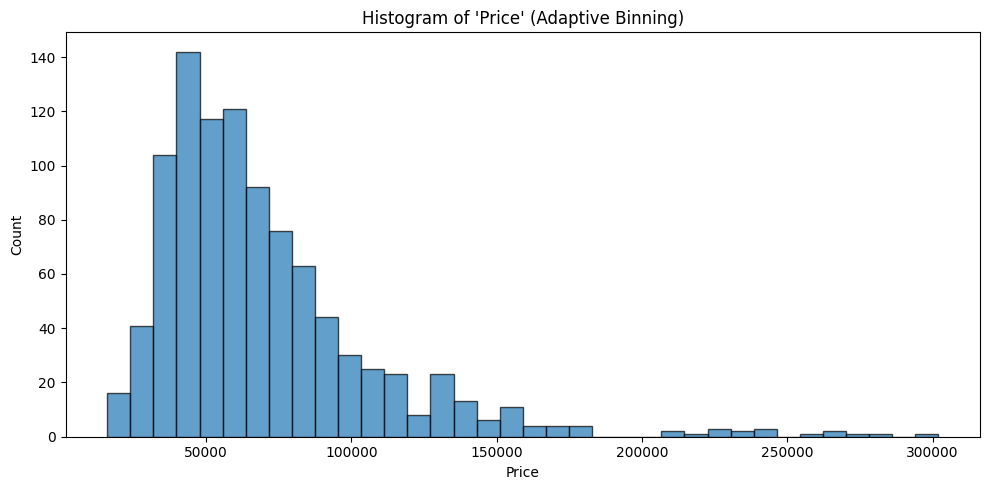

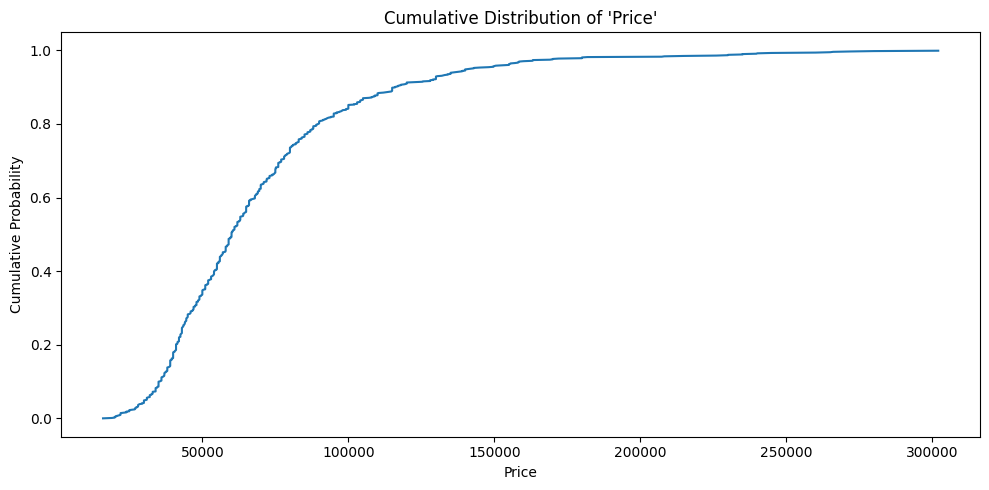

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get target series
target_series = loaded_df[dataset_config['target']]

# 1️⃣ Histogram with Freedman-Diaconis rule for binning
q25, q75 = np.percentile(target_series, [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr * len(target_series) ** (-1/3)
bin_count = int((target_series.max() - target_series.min()) / bin_width)
bin_count = max(10, bin_count)  # Ensure reasonable minimum bin count

plt.figure(figsize=(10, 5))
plt.hist(target_series, bins=bin_count, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of '{dataset_config['target']}' (Adaptive Binning)")
plt.xlabel(dataset_config['target'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2️⃣ Cumulative Distribution Function (CDF)
target_sorted = target_series.sort_values()
cdf = np.arange(len(target_sorted)) / len(target_sorted)

plt.figure(figsize=(10, 5))
plt.plot(target_sorted, cdf, color='tab:blue')
plt.title(f"Cumulative Distribution of '{dataset_config['target']}'")
plt.xlabel(dataset_config['target'])
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()



In [16]:
from baseline_eval import evaluate_baseline, plot_model_performance_summary
results = evaluate_baseline(
    df=loaded_df,
    model='AGTabular',
    df_name=dataset_config['dataset_name'],
    label_col= dataset_config['target'],
    task_type=dataset_config['task'],
    textual_cols=textual_cols,
    k_folds=5,
    seed=0,
    max_samples=3000,
    output_path=f"../../baseline_results/{dataset_config['task']}/{dataset_config['dataset_name']}.csv"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250521_145255"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
CPU Count:          64
Memory Avail:       338.10 GB / 503.54 GB (67.1%)
Disk Space Avail:   33800.04 GB / 51214.59 GB (66.0%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1



[WRAPPER] Running stratified downsampling mode for task: reg
Info: 
[INFO] Downsampling dataframe: laptops (original rows: 984)
Info: Dataset has only 984 rows. No downsampling needed.
Downsampled 984 rows for laptops dataset.


Beginning AutoGluon training ... Time limit = 360s
AutoGluon will save models to "/home/guptaa/anshul/FreeText_TaBench/datasets_notebooks/regression/AutogluonModels/ag-20250521_145255"
Train Data Rows:    787
Train Data Columns: 55
Label Column:       Price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    343928.07 MB
	Train Data (Original)  Memory Usage: 2.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFea

In [17]:
rs = pd.read_csv(f"../../baseline_results/{dataset_config['task']}/{dataset_config['dataset_name']}.csv")
plot_model_performance_summary(name=dataset_config['dataset_name'],task=dataset_config['task'], df=rs)

Saving plot to ../../baseline_results/plots/reg/score
Saving plot to ../../baseline_results/plots/reg/loss
Saving plot to ../../baseline_results/plots/reg/roc_auc


{'score':                                     mean       std
 model                                             
 AutoGluon_Tabular_without_text  0.826735  0.032376
 AutoGluon_Tabular_with_text     0.841672  0.019566,
 'loss':                                         mean          std
 model                                                    
 AutoGluon_Tabular_with_text     15166.779706  3326.131476
 AutoGluon_Tabular_without_text  15677.433577  2620.138838,
 'roc_auc':                                 mean  std
 model                                    
 AutoGluon_Tabular_with_text      NaN  NaN
 AutoGluon_Tabular_without_text   NaN  NaN}